In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_data, clinical_data, on="Mouse ID")
merge_table = merge_table[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites", "Drug"]]

# Display the data table for preview
merge_table.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn
5,f234,25,52.178602,2,Stelasyn
6,f234,30,56.873817,2,Stelasyn
7,f234,35,57.748758,2,Stelasyn
8,x402,0,45.000000,0,Stelasyn
9,x402,5,46.327570,1,Stelasyn


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_data = merge_table.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_df = pd.DataFrame(tumor_data) 

# Preview DataFrame
tumor_df.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stdtumor_data = merge_table.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
stdtumor_df = pd.DataFrame(stdtumor_data) 

# Preview DataFrame
stdtumor_df.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977

In [4]:
# Minor Data Munging to Re-Format the Data Frames. Use pivot table w/ three columns
tumor_format = tumor_df.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")

# Preview that Reformatting worked
tumor_format.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


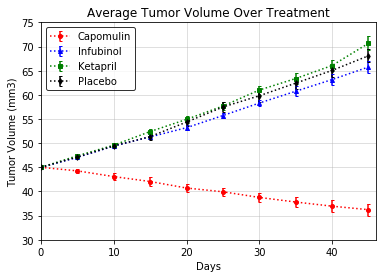

In [5]:
# Define lists for medication Capomulin, Inbufinol, Ketapril, and Placebo as shown in sample image.

# List of drugs
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# List timepoints
timepoints = np.arange(0, 50, 5)

# Create pivot table for tumor SEM
stdtumor_format = stdtumor_df.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")

# List for avg. tumor volumes by drug & SEM respectively
capomulin_A = tumor_format["Capomulin"].tolist()
infubinol_A = tumor_format["Infubinol"].tolist()
ketapril_A = tumor_format["Ketapril"].tolist()
placebo_A = tumor_format["Placebo"].tolist()
capomulin_B = stdtumor_format["Capomulin"].tolist()
infubinol_B = stdtumor_format["Infubinol"].tolist()
ketapril_B = stdtumor_format["Ketapril"].tolist()
placebo_B = stdtumor_format["Placebo"].tolist()

# Create plot
fig, ax = plt.subplots()
ax.errorbar(timepoints, capomulin_A, capomulin_B, fmt="o", label = "Capomulin", ms = 4, c ="red", linestyle =":", capthick = 1, capsize = 1.5)
ax.errorbar(timepoints, infubinol_A, infubinol_B, fmt="^", label = "Infubinol", ms = 4, c = "blue", linestyle =":", capthick = 1, capsize = 1.5)
ax.errorbar(timepoints, ketapril_A, ketapril_B, fmt="s", label = "Ketapril", ms = 4, c = "green", linestyle =":", capthick = 1, capsize = 1.5)
ax.errorbar(timepoints, placebo_A, placebo_B, fmt="d", label = "Placebo", ms = 4, c = "black", linestyle =":", capthick = 1, capsize = 1.5)

# Format chart area
ax.set_xlim(0, 46)
ax.set_ylim(30,75)
ax.set_xlabel("Days")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid(alpha = .5)
plt.title("Average Tumor Volume Over Treatment")
legend = ax.legend(loc='best', edgecolor = "black")

#Save plot in png format. Show plot
plt.savefig("results/Avg Tumor Volume (mm3) over Days.png")
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_data = merge_table.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
met_df = pd.DataFrame(met_data) 

# Preview DataFrame
met_df.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stdmet_data = merge_table.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
stdmet_df = pd.DataFrame(stdmet_data) 

# Preview DataFrame
stdmet_df.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames. Use pivot table w/ three columns
met_format = met_df.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")

# Preview that Reformatting worked
met_format

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


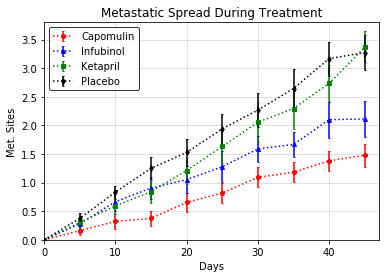

In [9]:
# Define lists for medication Capomulin, Inbufinol, Ketapril, and Placebo as shown in sample image.

# List of drugs
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# List timepoints
timepoints = np.arange(0, 50, 5)

# Create pivot table for tumor SEM
stdmet_format = stdmet_df.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")

# List for avg. tumor volumes by drug & SEM respectively
capomulin_C = met_format["Capomulin"].tolist()
infubinol_C = met_format["Infubinol"].tolist()
ketapril_C = met_format["Ketapril"].tolist()
placebo_C = met_format["Placebo"].tolist()
capomulin_D = stdmet_format["Capomulin"].tolist()
infubinol_D = stdmet_format["Infubinol"].tolist()
ketapril_D = stdmet_format["Ketapril"].tolist()
placebo_D = stdmet_format["Placebo"].tolist()

# Create plot
fig, ax = plt.subplots()
ax.errorbar(timepoints, capomulin_C, capomulin_D, fmt="o", label = "Capomulin", ms = 4, c ="red", linestyle =":", capthick = 1, capsize = 1)
ax.errorbar(timepoints, infubinol_C, infubinol_D, fmt="^", label = "Infubinol", ms = 4, c = "blue", linestyle =":", capthick = 1, capsize = 1)
ax.errorbar(timepoints, ketapril_C, ketapril_D, fmt="s", label = "Ketapril", ms = 4, c = "green", linestyle =":", capthick = 1, capsize = 1)
ax.errorbar(timepoints, placebo_C, placebo_D, fmt="d", label = "Placebo", ms = 4, c = "black", linestyle =":", capthick = 1, capsize = 1)

# Format chart area
ax.set_xlim(0, 47 , 0)
ax.set_ylim(0,3.8)
ax.set_xlabel("Days")
ax.set_ylabel("Met. Sites")
ax.grid(alpha = .5)
plt.title("Metastatic Spread During Treatment")
legend = ax.legend(loc='upper left', edgecolor = "black")

#Save plot in png format. Show plot
plt.savefig("results/Metastatic Spread During Treatment over Days.png")
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_data = merge_table.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
survival_df = pd.DataFrame(survival_data) 

# Preview DataFrame
survival_df.head(10)

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21

In [11]:
# Minor Data Munging to Re-Format the Data Frames
survival_format = survival_df.pivot_table("Mouse ID", ["Timepoint"], "Drug")

# Preview the Data Frame
survival_format

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


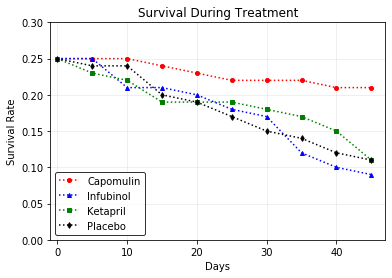

In [12]:
# Define lists for medication Capomulin, Inbufinol, Ketapril, and Placebo as shown in sample image.

# List of drugs
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# List timepoints
timepoints = np.arange(0, 50, 5)

# List for survival rate. Use list comprehension to calculate percentages
capomulin_E = survival_format["Capomulin"].tolist()
capomulin_F = [(x / 100) for x in capomulin_E]
infubinol_E = survival_format["Infubinol"].tolist()
infubinol_F = [(y / 100) for y in infubinol_E]
ketapril_E = survival_format["Ketapril"].tolist()
ketapril_F = [(z / 100) for z in ketapril_E]
placebo_E = survival_format["Placebo"].tolist()
placebo_F = [(p / 100) for p in placebo_E]

# Create plot
fig, ax = plt.subplots()
ax.errorbar(timepoints, capomulin_F, fmt="o", label = "Capomulin", ms = 4, c ="red", linestyle =":")
ax.errorbar(timepoints, infubinol_F, fmt="^", label = "Infubinol", ms = 4, c = "blue", linestyle =":")
ax.errorbar(timepoints, ketapril_F, fmt="s", label = "Ketapril", ms = 4, c = "green", linestyle =":")
ax.errorbar(timepoints, placebo_F, fmt="d", label = "Placebo", ms = 4, c = "black", linestyle =":")

# Format chart area
ax.set_xlim(-1, 47 , 0)
ax.set_ylim(0,.3)
ax.set_xlabel("Days")
ax.set_ylabel("Survival Rate")
ax.grid(alpha = .25)
plt.title("Survival During Treatment")
legend = ax.legend(loc='best', edgecolor = "black")

#Save plot in png format. Show plot
plt.savefig("results/Survival Rate During Treatment over Days.png")
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
chg_capo = round((capomulin_A[-1]-capomulin_A[0])/(capomulin_A[0]) * 100,3)
chg_infu = round((infubinol_A[-1]-infubinol_A[0])/(infubinol_A[0]) * 100,3)
chg_keta = round((ketapril_A[-1]-ketapril_A[0])/(ketapril_A[0]) * 100,3)
chg_place = round((placebo_A[-1]-placebo_A[0])/(placebo_A[0]) * 100,3)

#Create percent change list
chg_lst = [chg_capo, chg_infu, chg_keta, chg_place]

#create table with information
chg_table = pd.DataFrame({"Drug": drugList , "Tumor Percent Change": chg_lst})

# Display the data to confirm
chg_table

,Drug,Tumor Percent Change
0,Capomulin,-19.475
1,Infubinol,46.123
2,Ketapril,57.029
3,Placebo,51.298


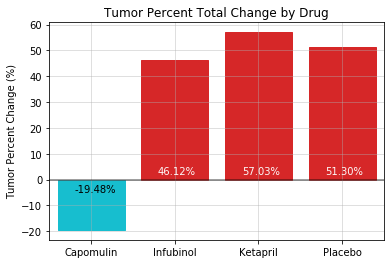

In [14]:
# Store all Relevant Percent Changes into a Tuple
bar_tumor = plt.bar(chg_table["Drug"], chg_table["Tumor Percent Change"])

# Splice the data between passing and failing drugs. Also, label percent changes
for i in range(len(drugList)):
    if chg_lst[i] < 0:
        bar_tumor[i].set_color("tab:cyan")
        txt = format(chg_lst[i]/100, ".2%")
        plt.text(-.2 + i, -5, txt, color = "black", alpha = 1)
    else:
        bar_tumor[i].set_color("tab:red")
        txt = format(chg_lst[i]/100, ".2%")
        plt.text(-.2 + i, 2, txt, color = "white", alpha = 1)
        
# Orient widths. Add labels, tick marks, etc. 
plt.hlines(0, -.5, 3.5, alpha=0.5)
plt.xlim(-.5, 3.5)
plt.title("Tumor Percent Total Change by Drug")
plt.ylabel("Tumor Percent Change (%)")
plt.grid(alpha = .5)

# Save the Figure
plt.savefig("results/Tumor Change over 45 Day Treatment.png")

# Show the Figure
fig.show()

## Study Observations

1) Capomulin is potentially the only drug that presents negative correlation w/ tumor percent growth thoughout the experiment. For metatastic spread over 25 days of treatment, capomulin error bars do not overlap with any other drug's suggesting that there may exist a significant statistical difference between the group.    

2) Ketapril and Placebo drugs performance did not vary significantly on patients over the same time interval for all categories. 

3) Infubinol could to be the second most effective drug of the group based on metatastic spread and tumor avg. volume graphs. However, further statistical evidence is required in order to determine Infubinol's effectiveness in treatment.  